In [110]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. 전처리

## 벡터값을 불러와서 word , vector의 dataframe으로 전처리

In [111]:
# 벡터화된 데이터 불러오기
# 이부분은 백인드에 적용할 떄 w2v를 돌린 결과 벡터값을 연결시키면 될거 같습니다.
data = pd.read_csv('abc2.txt',sep='\n')


# data가 'word 벡터값들~~~'로 이루어져있어서 데이터에서 앞 단어와 벡터값을 분리시켜 데이터프레임으로 만드는 전처리 작업
data['word']=data['vector']
for i in range(len(data)):
    data['word'][i] = data['word'][i].split()[0]
    data['vector'][i] = list(map(float,data['vector'][i].split()[1:]))
    
data = data[['word','vector']]

In [112]:
# 전처리된 data 형태
data

,word,vector
0,course,"[-0.010002829, 0.4893907, 0.39260754, 0.361852..."
1,Course,"[0.04415981, 0.61204344, 1.0224869, 0.741969, ..."
2,students,"[-0.014683737, 0.87794566, 0.67112565, 0.00348..."
3,Activity,"[-0.2624957, 0.7993511, 1.4638175, 0.8086156, ..."
4,term,"[-0.04844745, 0.39887828, 1.1303407, 0.8549380..."
...,...,...
4015,venture_initiation,"[-0.05462106, 0.05494892, 0.07397716, -0.03734..."
4016,class_sessions,"[-0.029300038, 0.026904741, 0.04654429, -0.027..."
4017,March,"[-0.0062646484, 0.018409923, 0.038180213, -0.0..."
4018,Brand,"[-0.08055495, 0.090325855, 0.16416715, 0.00535..."


# 벡터형태로 변환

## 현재 받아온 데이터는 vector가 아니라 그저 float타입의 숫자라 이를 벡터로 바꿔줌 

In [113]:
# 리스트에 각 단어들의 벡터값이 들어간 리스트를 전부 넣는다.
temp_vec = []
for i in range(len(data)):    
    temp_vec.append(data['vector'][i])
    

    
# 들어간 리스트들을 각 단어별 300차원(행:단어개수 열:300의 형태)의 벡터의 형태(numpy)로 변환
temp_vec = np.reshape(temp_vec,(-1,300))

# PCA를 이용해 300차원을 2차원으로 축소

## pca는 n차원을 분석하여 주축(principle compenent, 각 단어들을 특징을 분별력있는 축을 찾아서 원하는 차원으로 축소시킴)을 찾아 원하는 m차원으로 축소가능

In [114]:
# 시각화를 위해 축소하고 싶은 차원이 2차원이므로 주축을 2개로 설정)
pca = PCA(n_components=2)

# 뽑아낸 벡터를 pca모델에 적용
principalComponents = pca.fit_transform(temp_vec)

In [115]:
# 계산된 주축값들을 데이터 프레임 형태로 전환
df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'],index=data['word'])

In [116]:
# 2차원으로 바꿨을때의 벡터값.
# 저장형태
df

,principal component 1,principal component 2
word,,
course,2.542278,-0.986068
Course,8.722749,-1.148490
students,0.723565,0.425163
Activity,9.137703,-1.794410
term,9.534190,-0.729486
...,...,...
venture_initiation,-0.167574,0.009957
class_sessions,-0.109510,0.004516
March,-0.020318,0.008882


## pca결과값 기반 4020단원 2차원 시각화

C:\Users\jihun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jihun\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


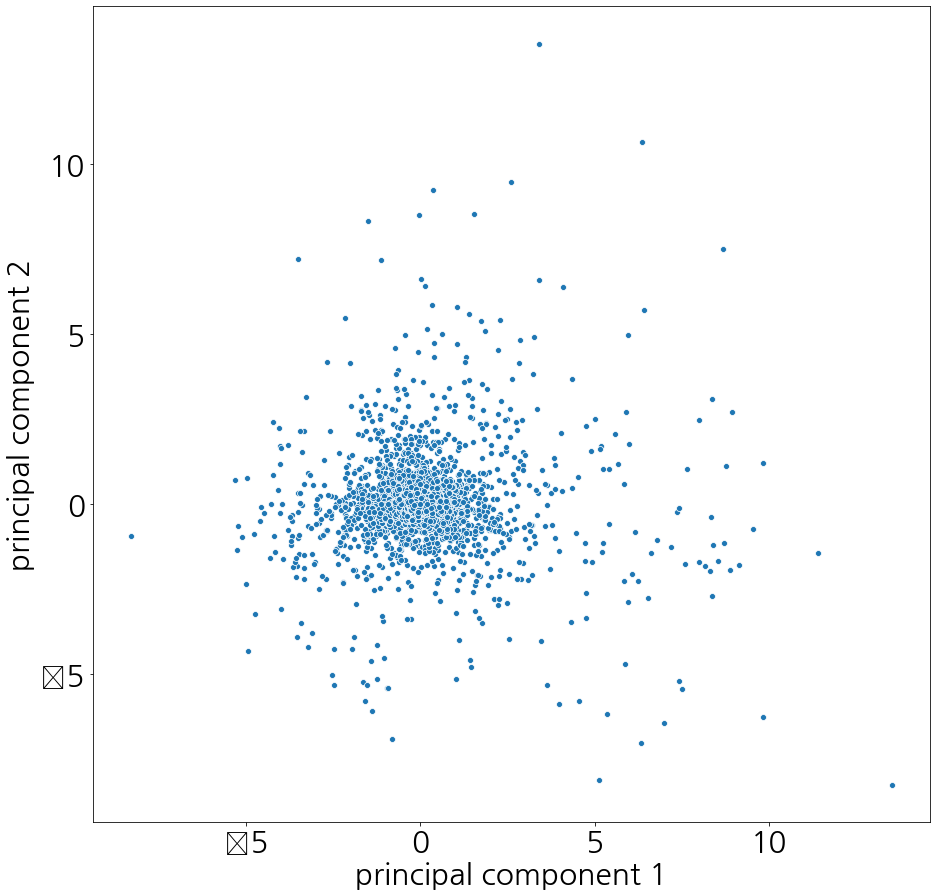

In [117]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x='principal component 1',y='principal component 2',data=df)


# 200개만 짤라서 보기!

In [118]:
ex_df = df[0:300]

In [119]:
ex_df

,principal component 1,principal component 2
word,,
course,2.542278,-0.986068
Course,8.722749,-1.148490
students,0.723565,0.425163
Activity,9.137703,-1.794410
term,9.534190,-0.729486
...,...,...
factors,-2.798959,-0.901708
paper,1.075042,1.586614
movements,-3.562473,-2.144411


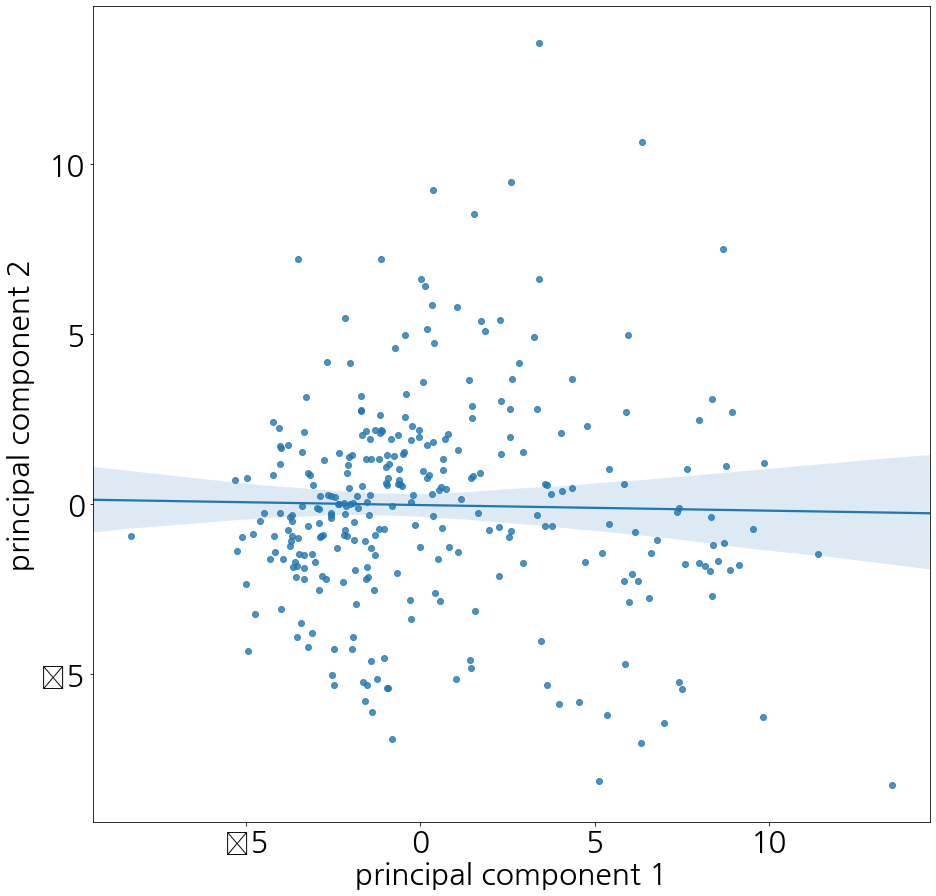

In [120]:
plt.figure(figsize=(15, 15))
sns.regplot(x='principal component 1',y='principal component 2',data=ex_df)


## 점 위에 해당하는 단어 삽입

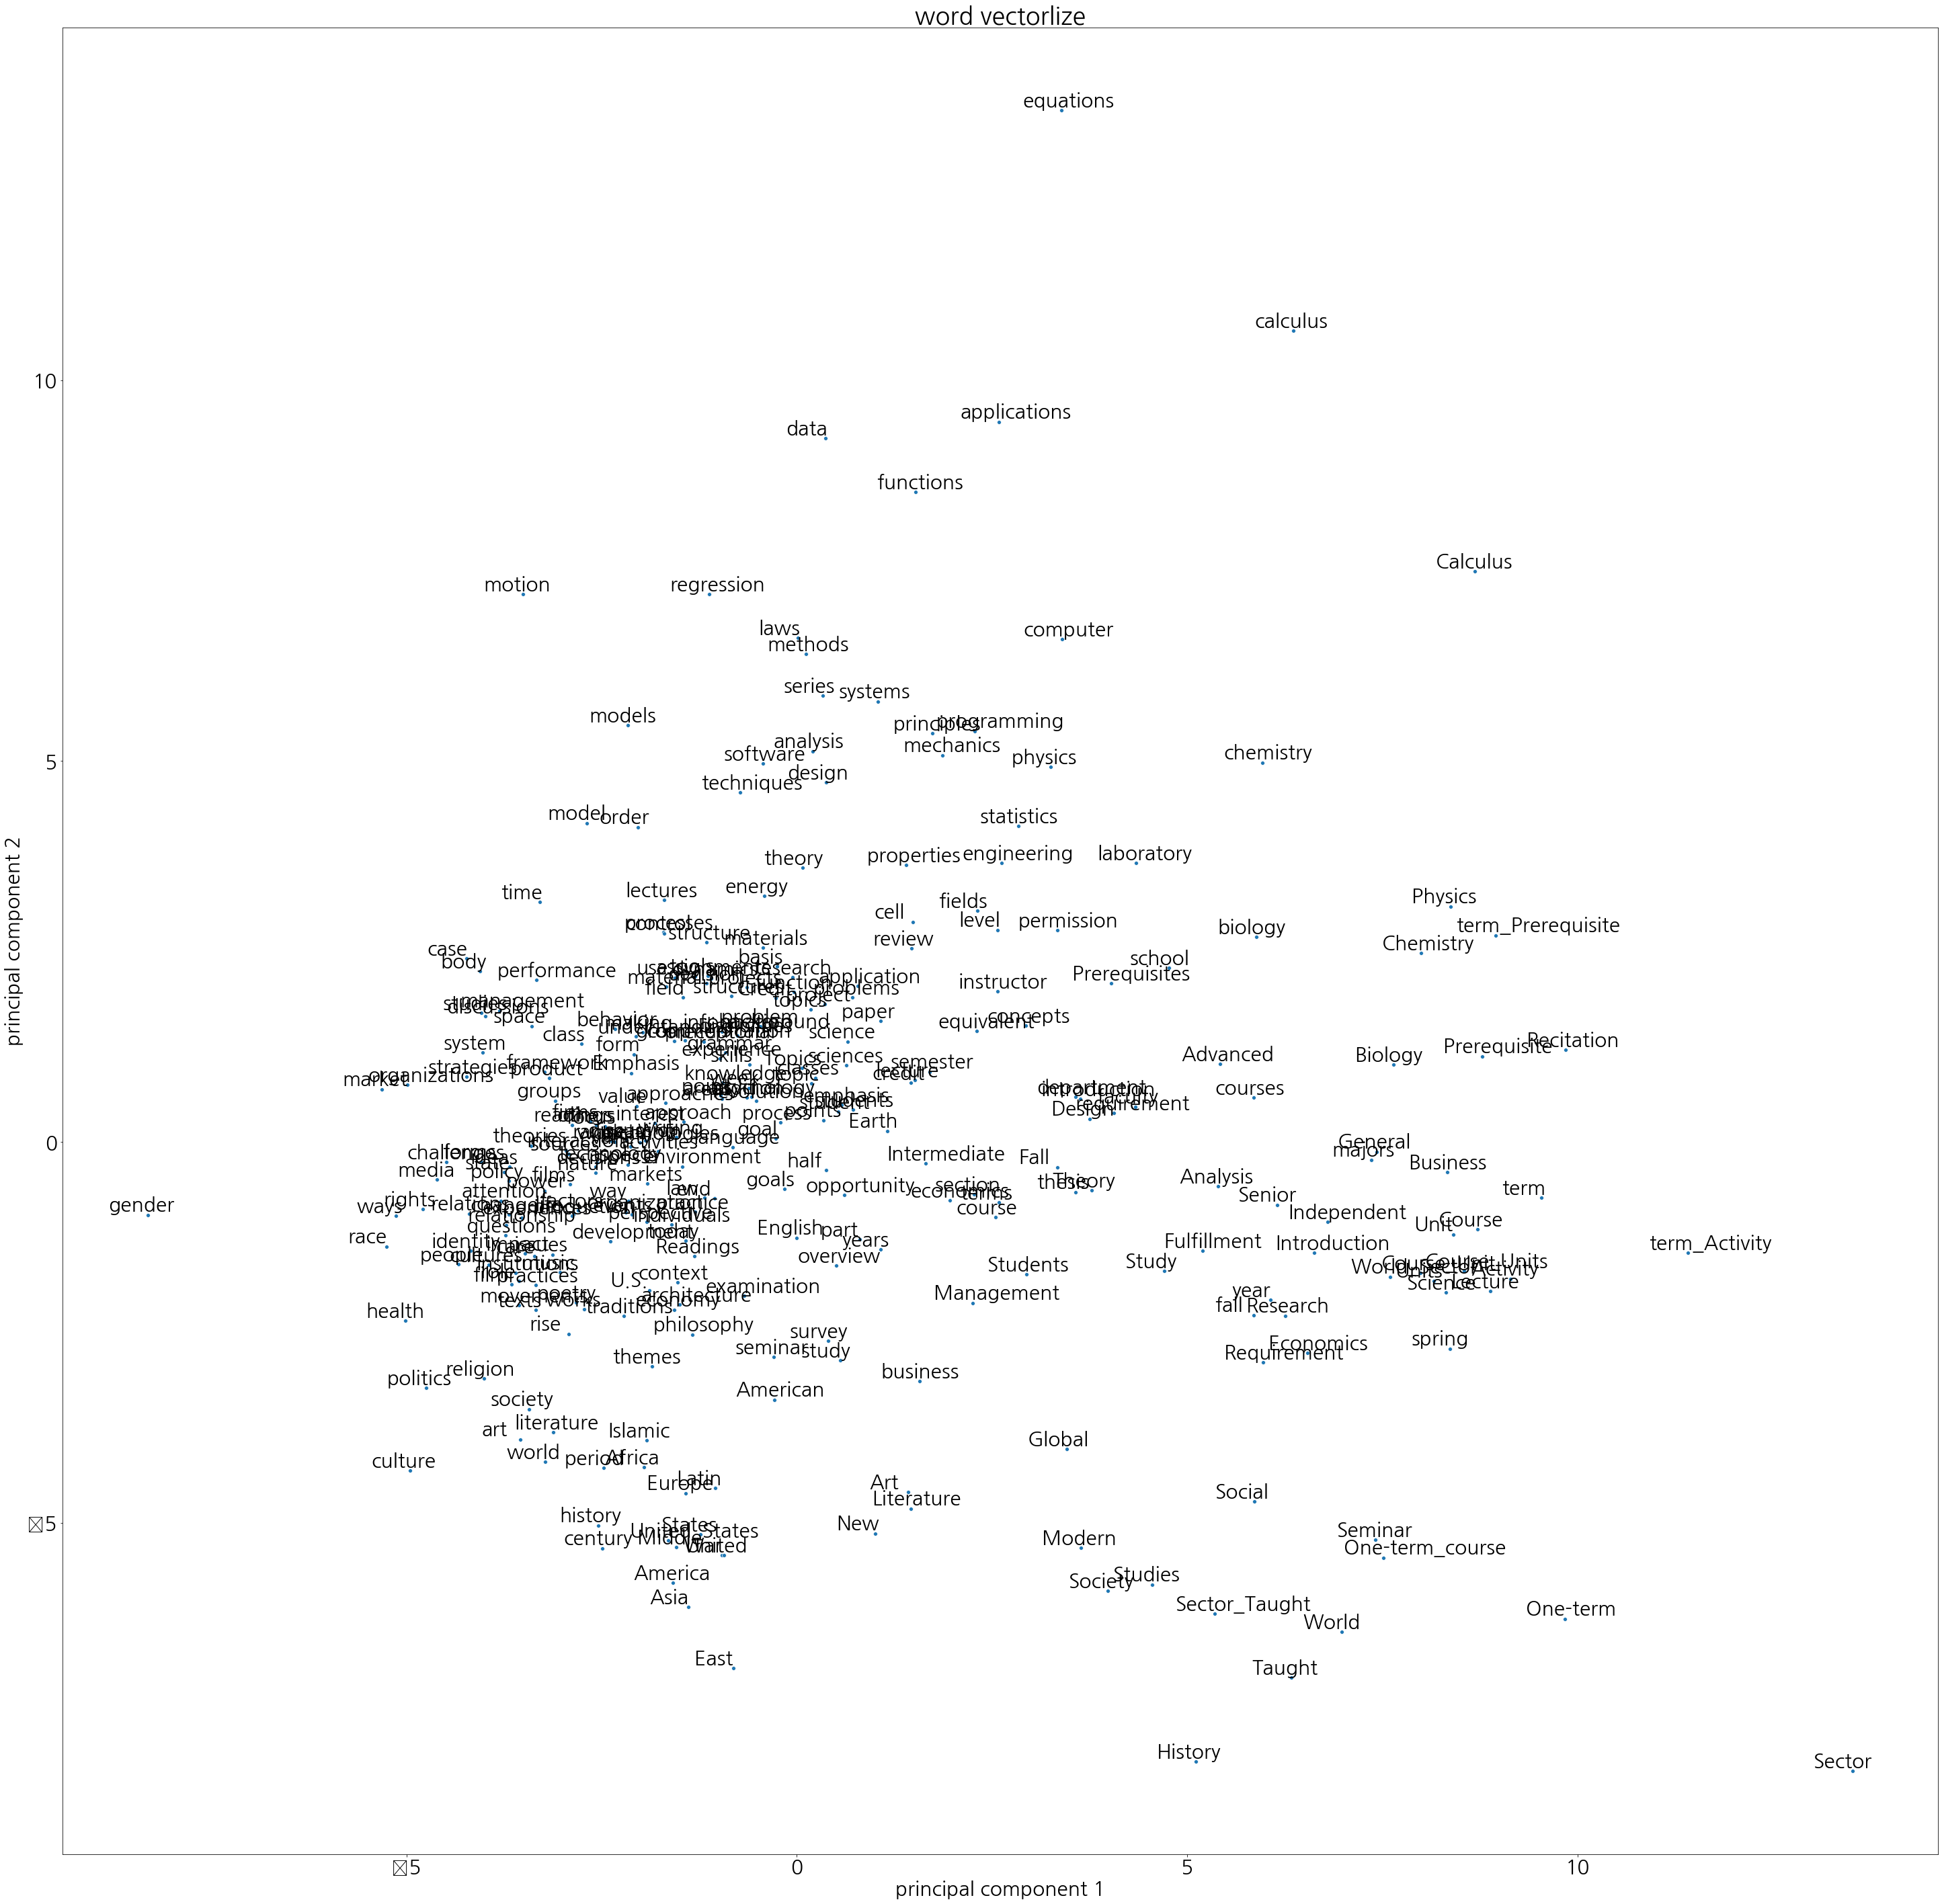

In [121]:
plt.figure(figsize=(50, 50))
ax=sns.scatterplot(x='principal component 1',y='principal component 2',data=ex_df ) 
plt.title('word vectorlize')
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 30
for i in range(len(ex_df)):
    ax.text(float(ex_df['principal component 1'][i]) - 0.5, float(ex_df['principal component 2'][i]) + 0.05, ex_df.index[i])

# 여기까지는 기분적인 로직이고 아래는 좀더 업그레이드?

## 중복되는 단어중 앞철자가 대문자인것들은 제거 코드

## 필요에 따라 넣기

In [124]:
# 데이터 정렬하기
data.sort_values(by=['word'], axis=0)

# 데이터 중복값 제거하기(마지막꺼만 남기기)
data=data.drop_duplicates(['word'], keep='last')


# top 10 중요단어 뽑기(영어버전)

# 데이터 들어오는 형태에 맞춰서 preprocess함수는 바꿔야 합니다. 결국은 학교학교명 , 설명text의 dataframe으로 형성

In [ ]:
import random
from sklearn.feature_extraction.text import TfidfVectorizer
import operator
import pandas as pd
import re
from konlpy.tag import Okt
okt=Okt()
import warnings
warnings.simplefilter("ignore")
import time
start = time.time()  # 시작 시간 저장
 
 





# 데이터 알맞은 형태로 전처리
# 저장된 데이터에서 필요한건 '학교명', '학과명', '학과소개글', '배우는과목소개글'
# 따라서 얘네 4명만 살리고 학교명과 학과명은 하나로 합친 데이터정제 코드
# 결론적적으로 데이터가 들어오면 '학교+학과' , '학과관련text'으로 return
def preprocess(documents):      
    documents = documents[['name','univname','text_intr','text_lect']]
    documents['name']=documents['univname']+' '+documents['name']
    documents = documents.drop(['univname'],axis=1)
    documents['text_intr']=documents['text_intr']+' '+documents['text_lect']
    documents = documents.drop(['text_lect'],axis=1)
    documents = documents.dropna(axis=0)
    documents=documents.reset_index(drop=True)
    return documents






# 선택한 학과와 그 외 학과를 랜덤으로 50개뽑아서 return
# n에는 원하는 학과의 인덱스를 입력
def random_choice(documents,n):
    df = pd.DataFrame( columns=['name', 'text_intr'])
    df=df.append(documents.loc[[n],:])
         
    x=[i for i in range(0,len(documents))]
    random.shuffle(x)
    x=x[:100]
    if n in x:
        x.remove(n)
    for i in x:
        df=df.append(documents.loc[[i],:])
        
    return df
        
        




# 영어과 띄어쓰기를 제외한 모든 부분을 제거, 명사만 남김
def trans_hangul(documents):
    text_list = list(documents['text_intr'])
    hangul = re.compile('[^a-zA-Z0-9]+')
    for i in range(len(text_list)):   
        text_list[i] = hangul.sub('', text_list[i])
        text_list[i]=(' '.join(okt.nouns(text_list[i])))
        
    return text_list






# 방대한 자료를 벡터화하는 함수(tfidf 훈련시키는 함수)
def training_tfidf(documents):
    global text_list_vec,word_index
    
# text_list_vec는 documents를 tfidf 벡터화한 벡터값(학습된 값)    
    text_list_vec = TfidfVectorizer().fit(documents)
# word_index는 각 단어의 고유 인덱스 값    
    word_index=text_list_vec.vocabulary_

    text_list_vec=text_list_vec.transform(documents).toarray()
    word_index = {v: k for k, v in word_index.items()}
    word_index = sorted(word_index.items(), key=operator.itemgetter(0))



    
    
    
# 학습된 tfidf를 바탕으로 중요도 높은 top100개를 도출
def make_top100():   

    result={}
    for i in range(len(text_list_vec[0])):
        if text_list_vec[0][i] != 0:
            result[word_index[i][1]] =  text_list_vec[0][i]
    result= sorted(result.items(), key=operator.itemgetter(1),reverse=True)
    top100={}
    for i in range(100):
        top100[result[i][0]] = result[i][1]
        
    return top100




#####################main############################
# 현 코드에는 연습용데이터불러오는 코드임.  
#실무에선 실제 저장된 학과관련 데이터와 연결하는 코드를 써야함.
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

documents=pd.read_excel('majors_textSet_복구.xlsx')



# 알고 싶은 학과의 index를 wanted_index의 값으로 입력
wanted_index = 100



# 정리
# 5000개 기존데이터 입력 -> 데이터 중 필요한 부분만 남기도록 전처리 -> 원하는 학과(index로 선택)와 그 외 50개만 뽑음
# -> 51개 데이터 에서 한글과 띄어쓰기만 남김, 그리고 단어만 남김(조사 형용사 전부 삭제) 
# -> 총 51개를 tfidf학습시킴(서로 비교하면서 각 단어에 점수가 메겨짐)
# -> 원하는 학과 데이터 중에서 단어의 점수를 내림차순으로 정렬한 뒤 top100개만 뽑음



# 실제 실행 코드
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

documents = preprocess(documents)

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

print(documents['name'][wanted_index])
documents = random_choice(documents,wanted_index)

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

documents =trans_hangul(documents)

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

training_tfidf(documents)

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

top100 = make_top100()
print(top100)


 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
